In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
DF = pd.read_csv('Churn.csv')
print(DF)
DF=pd.DataFrame(DF.drop('customerID', axis = 1))
DF = DF[DF['TotalCharges'] != " "]
DF["MultipleLines"].replace("No phone service","No",inplace=True)
DF["OnlineSecurity"].replace("No internet service","No",inplace=True)
DF["OnlineBackup"].replace("No internet service","No",inplace=True)
DF["DeviceProtection"].replace("No internet service","No",inplace=True)
DF["TechSupport"].replace("No internet service","No",inplace=True)
DF["StreamingTV"].replace("No internet service","No",inplace=True)
DF["StreamingMovies"].replace("No internet service","No",inplace=True)
DF.dropna()
DF.head()

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
##label encoding (problem with the TotalCharges column due to an empty cell at 448, so had to label encode it also)
from sklearn.preprocessing import LabelEncoder
colslabel =['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']
DF[colslabel] = DF[colslabel].apply(LabelEncoder().fit_transform)
print(DF)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                0     

In [4]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = pd.DataFrame(DF['Churn'])
X = pd.DataFrame(DF.drop('Churn', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators = 300, 
                                 max_depth = 10)       
rforest.fit(X_train, y_train.Churn.ravel())

RandomForestClassifier(max_depth=10, n_estimators=300)

Train Data
Accuracy  :	 0.886834620073141

TPR Train :	 0.7043010752688172
TNR Train :	 0.9524861878453039

FPR Train :	 0.04751381215469613
FNR Train :	 0.2956989247311828


<AxesSubplot:>

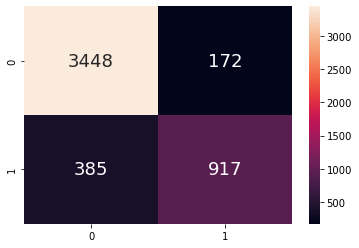

In [5]:

from sklearn.metrics import confusion_matrix
y_train_pred = rforest.predict(X_train)
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]
print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8018957345971564

TPR Test :	 0.5149911816578483
TNR Test :	 0.9073233959818535

FPR Test :	 0.09267660401814647
FNR Test :	 0.48500881834215165


<AxesSubplot:>

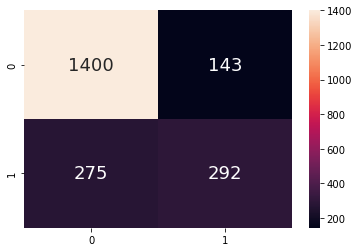

In [6]:

from sklearn.metrics import confusion_matrix
y_test_pred = rforest.predict(X_test)
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]   
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [7]:
##Hyper parameter testing, to be revised,(DOESNT WORK??)##
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Churn.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))